In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# read files 
df_atbats = pd.read_csv('data/2019_atbats.csv')
df_games = pd.read_csv('data/2019_games.csv')
df_pitches = pd.read_csv('data/2019_pitches.csv')
df_players = pd.read_csv('data/player_names.csv')

In [3]:
# make sure that all players' ids are included in df_players 
pitcher_ids = df_atbats['pitcher_id'].unique()
batter_ids = df_atbats['batter_id'].unique()

for i,n in enumerate(pitcher_ids):
    if i not in df_players['id']:
        print(f'{n} is not inside df_players')
        
for i,n in enumerate(batter_ids):
    if i not in df_players['id']:
        print(f'{n} is not inside df_players')

In [4]:
# extract pitcher_id, batter_id and ab_id (at bat id) from df_atbats
df_atbats_extract = df_atbats[['ab_id','pitcher_id','batter_id']]
df_atbats_extract.head()

,ab_id,pitcher_id,batter_id
0,2.019000e+09,571666,594777
1,2.019000e+09,571666,545361
2,2.019000e+09,571666,571506
3,2.019000e+09,502239,543257
4,2.019000e+09,502239,656305


In [5]:
# merge df_atbats_extract to df_pitches
df = df_pitches.merge(df_atbats_extract, how='left', on='ab_id')
df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pitcher_id,batter_id
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,...,2.019000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,571666,594777
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,...,2.019000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0,571666,545361
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,...,2.019000e+09,0.0,0.0,1.0,2.0,0.0,0.0,0.0,571666,545361
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,...,2.019000e+09,0.0,1.0,1.0,3.0,0.0,0.0,0.0,571666,545361
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,...,2.019000e+09,1.0,1.0,1.0,4.0,0.0,0.0,0.0,571666,545361


<span style="color:orange">  
    
### goals/steps
    
1. velo is not the sole factore that makes a pitcher good or bad 
    - cite from Moneyball
    - show plots of fast ball velo v.s. performance metrics
2. decide what is a fastball (FT, FF) and calcuate the 'velo' of each pitcher
3. use KMeans (or a better model) to cluster pitchers into fastball-based pitchers or not
4. for the two groups, identify the difference, compare their performance, etc. 
5. explore: what makes a pitcher who has a slower pitch excel his counterparts?
    - breaking balls
    - pitch control
6. discuss whether it is possible for a pitcher from another league (e.g. CPBL) and does not throw fireball to survive and thrive in the MLB
7. acknowledge factors not taken into account in this study (e.g. psychological, pitch sequence (maybe try to incorporate but got to find a way to), etc.
</span>.

In [6]:
# 0. data cleaning and data wrangling

In [7]:
# link name / id 

In [8]:
# group pitch types according to statcast

In [9]:
# 1. # show that pitch velo does not directly affect your performance 

In [10]:
# refer to the dataset 2019

In [11]:
# create columns: IP, ER, BB, H, SO, HR

In [12]:
# calculate ERA, FIP, WHIP 

In [13]:
# plot max velo versus the three metrics

In [14]:
# 2. categorize pitchers into fastball-based and non-fastball-based

In [15]:
# test and try 

In [16]:
df_pitchers_stats = pd.read_csv('data/2019_p_stats.csv', index_col=0)
df_pitchers_stats[df_pitchers_stats['Name']=='Trevor Bauer']

df[df['pitcher_id']==458681].shape
df[df['pitcher_id']==458681].groupby('pitch_type').size()
# df.groupby('pitcher_id').size().sort_values()

pitch_type
CH     101
CU     323
FC     536
FF    1797
FT     577
dtype: int64

In [17]:
df_players[df_players['id']==458681]

,id,first_name,last_name
241,458681,Lance,Lynn


In [18]:
# first off, calculate the number of batters faced by each pitcher 

# generally, without considering any other factors (e.g. age, injury, etc.), a good pitcher is expected to be used 
# more frequently by the team

# repeatedly by the team throughout the season
# instead of only once or twice

# the column pitch_num is the pitch count of every at_bat 
# which means that by calculating the occurrence of pitch_number == 1
# we would be able to know how many batters a pitcher faced off thorughout this season

batters_faced_df = df[df['pitch_num']==1.0].groupby('pitcher_id')['pitch_num'].sum().sort_values().rename('batters_faced').to_frame()
batters_faced_df


,batters_faced
pitcher_id,
592407,1.0
545358,1.0
576397,1.0
476454,2.0
621002,3.0
...,...
458681,852.0
605400,854.0
669456,863.0


,id,first_name,last_name
241,458681,Lance,Lynn
506,621121,Lance,McCullers


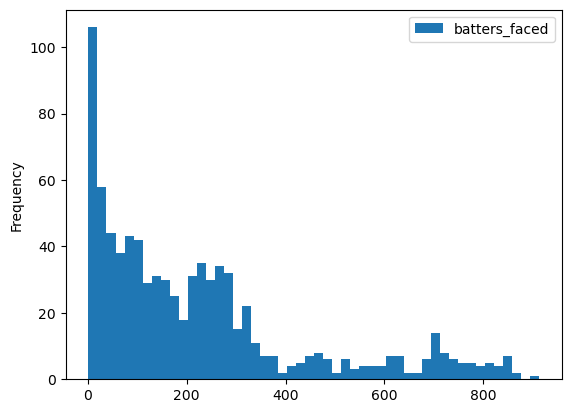

In [19]:
batters_faced_df.plot.hist(bins=50)
df_players[df_players['id']==501985]
df_players[df_players['first_name']=='Lance']


In [20]:
df.groupby('pitch_type')['start_speed'].describe().sort_values('max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
pitch_type,,,,,,,,
SI,55361.0,92.200594,3.036581,74.5,90.200,92.30,94.100,104.3
FF,261485.0,93.399953,2.677904,50.6,91.800,93.50,95.200,102.9
FT,61044.0,92.679174,2.652495,71.7,91.000,92.80,94.500,102.5
FC,46339.0,88.459954,2.865279,58.0,86.600,88.30,90.400,101.4
SL,127680.0,84.656396,3.254616,50.7,82.600,84.80,86.900,97.1
CH,79939.0,84.492958,3.467823,51.2,82.500,84.80,86.900,96.7
FS,10538.0,85.158398,2.513973,74.9,83.600,85.30,86.900,93.8
KC,15324.0,80.663436,3.067965,64.1,79.100,80.80,82.500,91.3
CU,64166.0,78.541277,3.597731,50.8,76.200,78.80,81.100,90.1


In [21]:
# from the .describe() table, pitches that have max velo over 100mph are SI, FF, FT and FC.
# SI even has the highest max velo (even faster than FF and FT) 

# however, in most scenarios, only four-seam and two-seam are considered straight up fastball
# this can also be intepretted from the visualization

/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

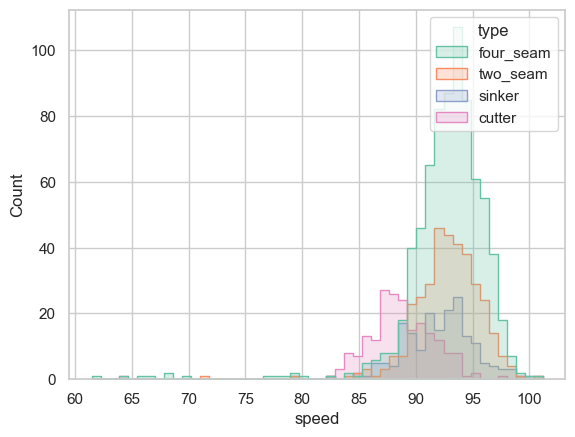

In [22]:
# visualize the distributions of the top four pitches (FF, FT, SI, FC) in terms of repeat measure (i.e. group by pitchers)

FF = df[df['pitch_type']=='FF'].groupby('pitcher_id')['start_speed'].mean().rename('four_seam')
FT = df[df['pitch_type']=='FT'].groupby('pitcher_id')['start_speed'].mean().rename('two_seam')
SI = df[df['pitch_type']=='SI'].groupby('pitcher_id')['start_speed'].mean().rename('sinker')
FC = df[df['pitch_type']=='FC'].groupby('pitcher_id')['start_speed'].mean().rename('cutter')

fastballs = pd.concat([FF, FT, SI, FC], axis=1)
# fastballs

# reshape to long dataframe (for seaborn)
fastballs_long = fastballs.melt(var_name='type', value_name='speed')
# fastballs_long

sns.set(style='whitegrid')
sns.color_palette("Set2")
sns.histplot(data=fastballs_long, x='speed', hue='type', bins=50, element='step', palette='Set2')
plt.show()

# ignore warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# when comparing the distribution of sinker to four-seam and two-seam, it is actually ...(TODO)

In [24]:
# now we only consider fastballs as either four-seam or two-seam. 
# to visualize the fastball velocity distribution of the MLB pitchers, first we need to decide
# how we are going to choose between FF and FT 

<Axes: xlabel='four_seam', ylabel='two_seam'>

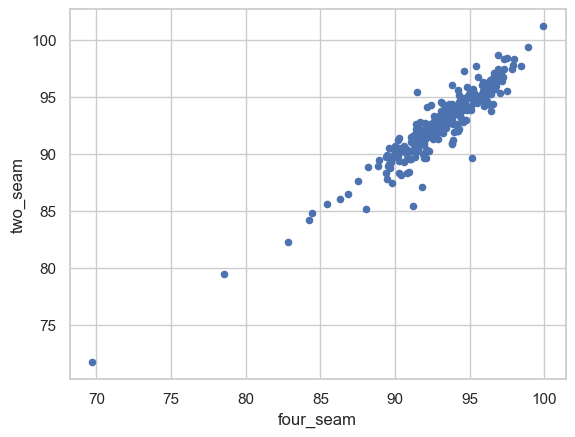

In [25]:
# (decided to only consider FF and FT as fastballs)
# now visualize the ...
fastballs[fastballs['four_seam']<fastballs['two_seam']].sort_values('two_seam', ascending=False)
fastballs[fastballs['four_seam']>fastballs['two_seam']].sort_values('four_seam', ascending=False)
fb=fastballs.drop(columns=['sinker','cutter'])
fb.plot.scatter(x='four_seam',y='two_seam')

/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


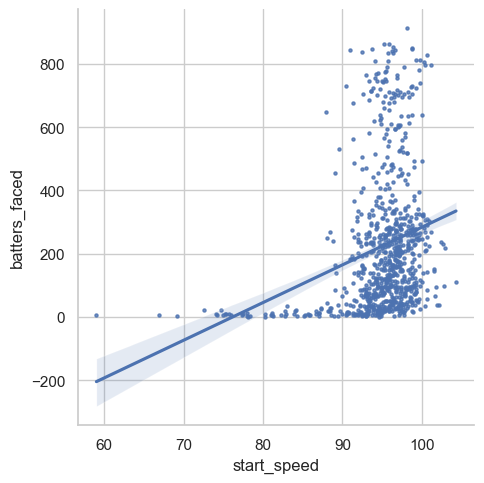

In [26]:
# plot fast ball velo v.s. number of batter faced 
# to show that good fast ball velo is not the sole factor that contribute to the goodness of a pitcher

batters_faced_df
start_speed_df = df.groupby('pitcher_id')['start_speed'].max().to_frame()
battersfaced_speed = pd.concat([batters_faced_df,start_speed_df], axis=1)
battersfaced_speed

# battersfaced_speed.plot.scatter(x='batters_faced',y='pitch_num')
sns.lmplot(x='start_speed',y='batters_faced',data=battersfaced_speed,fit_reg=True,scatter_kws={'s':5}) 

# should get rid of the regression line here. 
# make a plot that get rid of the outliers and put up the regression line on that one

# result: the plot shows that even you have a max velo over 100mph, you are not guaranteed to be 
# one of the most used pitchers in your team
# also be mindful that this plot does not take in any additional information
# i.e. whether this pitcher injured themselves so that they did not pitch a lot 

In [27]:
# analyze pitchers with slower fast ball - what else makes them so good?

In [28]:
# now that we have three kinds of fastballs, we want to know whether a pitcher use one of the fastballs predominantly, 
# or there are actually some pitchers use a mix of different fast balls. 

# summarize a table that include ratios of different fastballs 
# and plot 

In [29]:
# ARCHIVE

# next, consider a pitcher only use one of the three fastballs as their predominantly used fastball 
# find the type of fastball that each pitcher throws the most among the three 
# use that as 'his fastball' and plot a histogram of fastball velo across all MLB pitchers

# fastballs